# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [94]:
%matplotlib notebook
plt.style.use('classic')

In [2]:
url1 = 'https://en.wikipedia.org/wiki/List_of_Major_League_Baseball_annual_wins_leaders'
df1=pd.read_html(url1,header=0)[1].dropna(how='all',axis=1)

In [3]:
#This dataframe contains the list of winner pitching in NL since 1900
NL_pitch = df1.where(df1['Year']>1900).dropna()
NL_pitch.set_index('Year',inplace = True)
NL_pitch.head()

,Champion(s),W,Team,Runner(s)-up,W.1,Ref
Year,,,,,,
1901.0,Bill Donovan,25.0,Brooklyn Superbas,Jack Harper,23.0,[48]
1902.0,Jack Chesbro†,28.0,Pittsburgh Pirates,Togie PittingerVic Willis†,27.0,[49]
1903.0,Joe McGinnity†,31.0,New York Giants,Christy Mathewson†,30.0,[50]
1904.0,Joe McGinnity†,35.0,New York Giants,Christy Mathewson†,33.0,[51]
1905.0,Christy Mathewson†,31.0,New York Giants,Togie Pittinger,23.0,[52]


In [142]:
#This dataframe contains the list of winner pitching in AL since 1900
AL_pitch = pd.read_html(url1,header=0)[2].dropna(how='all',axis=1)
AL_pitch.set_index('Year',inplace = True)
AL_pitch.head()

,Leader,W,Team,Runner-up,W.1,Ref
Year,,,,,,
1901,Cy Young†,33,Boston Americans,Joe McGinnity†,26,[169]
1902,Cy Young†,32,Boston Americans,Rube Waddell†,24,[170]
1903,Cy Young†,28,Boston Americans,Eddie Plank†,23,[171]
1904,Jack Chesbro†,41,New York Highlanders,Eddie Plank†Cy Young†,26,[172]
1905,Rube Waddell†,27,Philadelphia Athletics,Eddie Plank†,24,[173]


In [16]:
#This dataframe contains the years in which NL runner-up was better than AL pitching winner
ns_best = NL_pitch.where(NL_pitch['W.1'] > AL_pitch['W']).dropna()
ns_best.head()

,Champion(s),W,Team,Runner(s)-up,W.1,Ref
Year,,,,,,
1903.0,Joe McGinnity†,31.0,New York Giants,Christy Mathewson†,30.0,[50]
1927.0,Charlie Root,26.0,Chicago Cubs,Jesse Haines†,24.0,[74]
1936.0,Carl Hubbell†,26.0,New York Giants,Dizzy Dean†,24.0,[83]
1939.0,Bucky Walters,27.0,Cincinnati Reds,Paul Derringer,25.0,[86]
1947.0,Ewell Blackwell,22.0,Cincinnati Reds,Ralph BrancaLarry JansenJohnny SainWarren Spahn†,21.0,[94]


In [18]:
#This dataframe contains the years in which AL runner-up was better than AL pitching winner
as_best = AL_pitch.where(AL_pitch['W.1'] > NL_pitch['W']).dropna()
as_best.head()

,Leader,W,Team,Runner-up,W.1,Ref
Year,,,,,,
1901,Cy Young†,33.0,Boston Americans,Joe McGinnity†,26.0,[169]
1907,Addie Joss†Doc White,27.0,Cleveland NapsChicago White Sox,Bill DonovanEd Killian,25.0,[175]
1912,Joe Wood,34.0,Boston Red Sox,Walter Johnson†,33.0,[180]
1921,Carl MaysUrban Shocker,27.0,New York YankeesSt. Louis Browns,Red Faber†,25.0,[189]
1922,Eddie Rommel,27.0,Philadelphia Athletics,Joe Bush,26.0,[190]


In [100]:
url2 = 'https://en.wikipedia.org/wiki/List_of_Major_League_Baseball_annual_home_run_leaders'
df2 = pd.read_html(url2,header=0)[2].dropna(how='all',axis=1)
df2.head()

,Year,Winner(s),HR,Team,Runner(s)-up,2nd HR,Ref
0,1876,George Hall,5,Philadelphia Athletics (NL),Charley Jones,4,[134]
1,1877,Lip Pike,4,Cincinnati Reds,Orator Shafer,3,[135]
2,1878,Paul Hines,4,Providence Grays,Charley Jones,3,[136]
3,1879,Charley Jones,9,Boston Red Caps,Jim O'Rourke†,6,[137]
4,1880,Harry StoveyJim O'Rourke†,6,Worcester Ruby LegsBoston Red Caps,Charley Jones,5,[138]


In [175]:
#NL Batting winners since 1901
NL_batting = df2.where(df2['Year'] > 1900).dropna().reset_index(drop =  True).set_index('Year')
NL_batting['HR']=NL_batting['HR'].astype(int)
NL_batting.head()

,Winner(s),HR,Team,Runner(s)-up,2nd HR,Ref
Year,,,,,,
1901.0,Sam Crawford†,16,Cincinnati Reds,Jimmy Sheckard,11.0,[159]
1902.0,Tommy Leach,6,Pittsburgh Pirates,Jake Beckley†,5.0,[160]
1903.0,Jimmy Sheckard,9,Brooklyn Superbas,Pat MoranTommy LeachMike DonlinSam MertesCy Se...,7.0,[161]
1904.0,Harry Lumley,9,Brooklyn Superbas,Dave Brain,7.0,[162]
1905.0,Fred Odwell,9,Cincinnati Reds,Cy Seymour,8.0,[163]


In [172]:
#NL Batting winners since 1901
AL_batting = pd.read_html(url2,header=0)[1].dropna(how='all',axis=1).set_index('Year')
AL_batting.head()

,Winner(s),HR,Team,Runner(s)-up,2nd HR,Ref
Year,,,,,,
1901,Nap Lajoie†,14,Philadelphia Athletics,Buck Freeman,12,[16]
1902,Socks Seybold,16,Philadelphia Athletics,Charlie HickmanBill BradleyBuck Freeman,11,[17]
1903,Buck Freeman,13,Boston Americans,Charlie Hickman,12,[18]
1904,Harry Davis,10,Philadelphia Athletics,Danny MurphyBuck Freeman,7,[19]
1905,Harry Davis,8,Philadelphia Athletics,George Stone,7,[20]


In [176]:
#This dataframe contains the years in which AL runner-up batting was better than NL batting winner
as_best_bat = AL_batting.where(AL_batting['2nd HR'] > NL_batting['HR']).dropna()
as_best_bat.head()

,Winner(s),HR,Team,Runner(s)-up,2nd HR,Ref
Year,,,,,,
1902,Socks Seybold,16.0,Philadelphia Athletics,Charlie HickmanBill BradleyBuck Freeman,11.0,[17]
1903,Buck Freeman,13.0,Boston Americans,Charlie Hickman,12.0,[18]
1920,Babe Ruth†,54.0,New York Yankees,George Sisler†,19.0,[35]
1921,Babe Ruth†,59.0,New York Yankees,Ken WilliamsBob Meusel,24.0,[36]
1927,Babe Ruth†,60.0,New York Yankees,Lou Gehrig†,47.0,[42]


In [177]:
#This dataframe contains the years in which NL runner-up batting was better than AL batting winner
ns_best_bat = NL_batting.where(NL_batting['2nd HR'] > AL_batting['HR']).dropna()
ns_best_bat.head()

,Winner(s),HR,Team,Runner(s)-up,2nd HR,Ref
Year,,,,,,
1907.0,Dave Brain,10.0,Boston Doves,Harry Lumley,9.0,[165]
1908.0,Tim Jordan,12.0,Brooklyn Superbas,Honus Wagner†,10.0,[166]
1911.0,Frank Schulte,21.0,Chicago Cubs,Fred Luderus,16.0,[169]
1912.0,Heinie Zimmerman,14.0,Chicago Cubs,Frank Schulte,12.0,[170]
1913.0,Gavvy Cravath,19.0,Philadelphia Phillies,Fred Luderus,18.0,[171]


<IPython.core.display.Javascript object>


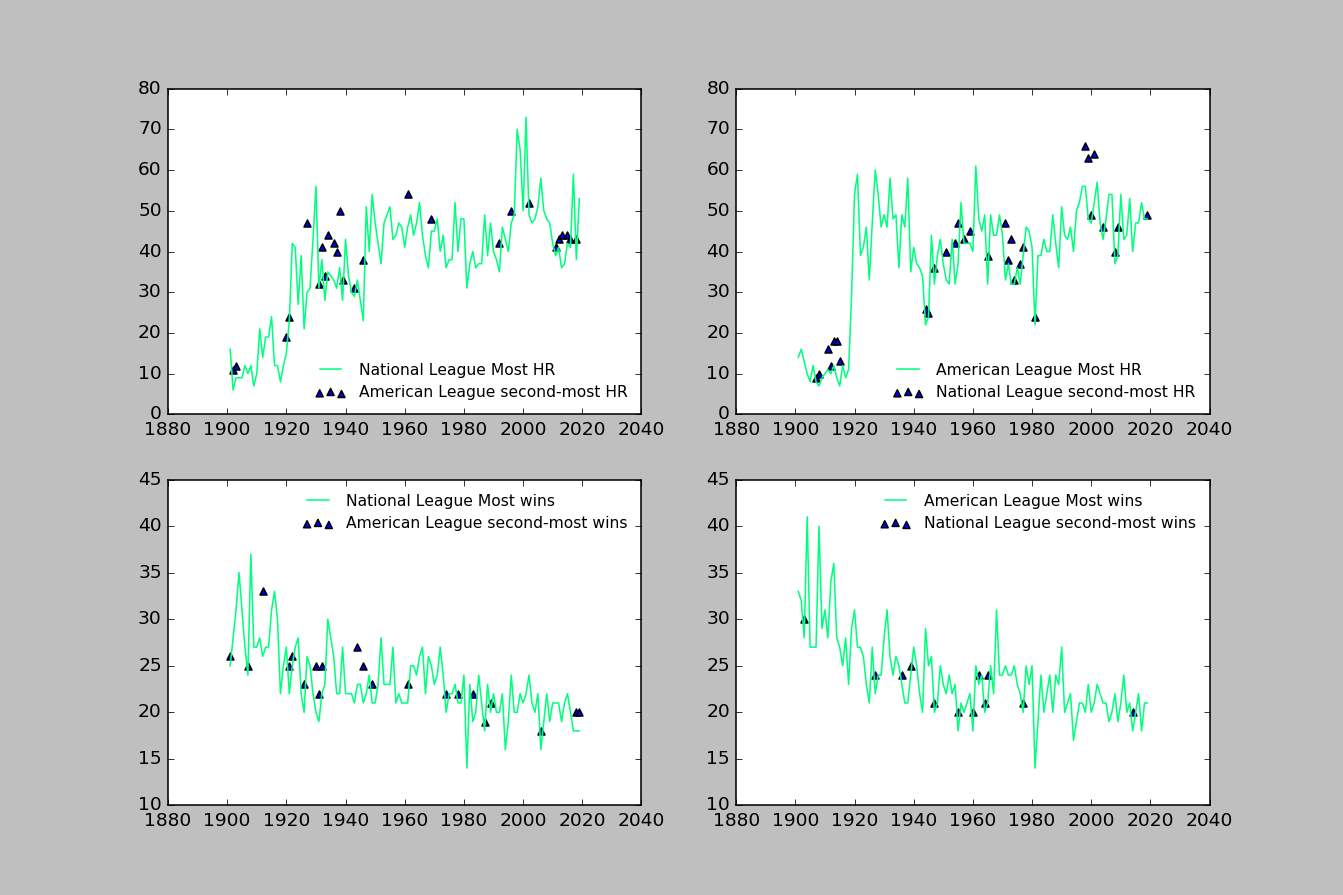

In [190]:
# create 2x1 grid of axis subplots
plt.figure(figsize = (12,8))

ax1 = plt.subplot(2, 2, 1)
plt.plot( NL_batting['HR'], c = 'springgreen')
high = plt.scatter(as_best_bat.index,as_best_bat['2nd HR'],marker = '^')


# add a legend (uses the labels from plt.scatter)
plt.legend(['National League Most HR',
            'American League second-most HR']
           ,loc=4, frameon=False, prop={'size': 10})


ax2 = plt.subplot(2, 2, 2, sharey=ax1)
axes[1] = plt.plot(AL_batting['HR'], c = 'springgreen')
high = plt.scatter(ns_best_bat.index,ns_best_bat['2nd HR'],marker = '^')


# add a legend (uses the labels from plt.scatter)
plt.legend(['American League Most HR',
            'National League second-most HR']
           ,loc=4, frameon=False, prop={'size': 10})



ax3 = plt.subplot(2, 2, 3)
plt.plot( NL_pitch['W'], c = 'springgreen')
high = plt.scatter(as_best.index,as_best['W.1'],marker = '^')


# add a legend (uses the labels from plt.scatter)
plt.legend(['National League Most wins',
            'American League second-most wins']
           ,loc=1, frameon=False, prop={'size': 10})


ax4 = plt.subplot(2, 2, 4, sharey=ax3)
plt.plot(AL_pitch['W'], c = 'springgreen')
high = plt.scatter(ns_best.index,ns_best['W.1'],marker = '^')


# add a legend (uses the labels from plt.scatter)
plt.legend(['American League Most wins',
            'National League second-most wins']
           ,loc=1, frameon=False, prop={'size': 10})




plt.show();